В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [1]:
from process_bank_churn import preprocess_data, preprocess_new_data

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import seaborn as sns

In [3]:
raw_df = pd.read_csv('bank-customer-churn-prediction-dlu/train.csv')
data = preprocess_data(raw_df, scaler_numeric=False)

In [4]:
X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
input_cols = data['input_cols']
scaler = data['scaler']
encoder = data['encoder']

In [5]:
model = DecisionTreeClassifier(random_state=29)

In [6]:
%%time
model.fit(X_train, y_train)

CPU times: total: 31.2 ms
Wall time: 47 ms


DecisionTreeClassifier(random_state=29)

In [7]:
y_train_probs = model.predict_proba(X_train)[:, 1]
y_val_probs = model.predict_proba(X_val)[:, 1]

Area Under ROC Curve (AUC): 1.0000


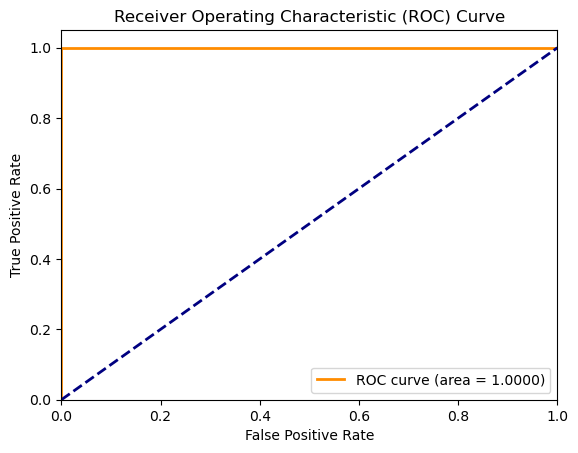

In [8]:
# Обчислення ROC-кривої
fpr, tpr, thresholds = roc_curve(y_train, y_train_probs)

# Обчислення AUC
roc_auc = auc(fpr, tpr)

# Виведення AUC
print(f'Area Under ROC Curve (AUC): {roc_auc:.4f}')

# Побудова графіку ROC-кривої
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Area Under ROC Curve (AUC): 0.7697


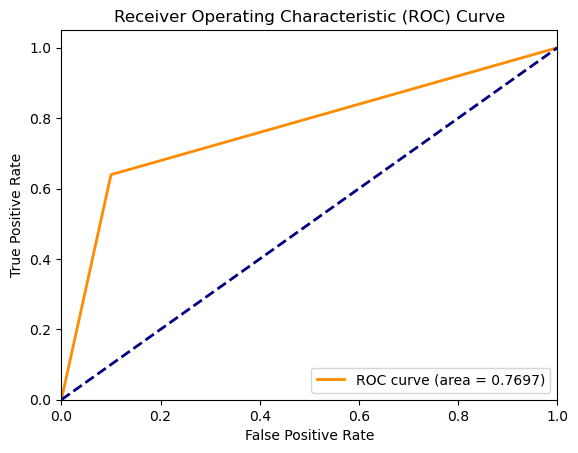

In [9]:
# Обчислення ROC-кривої
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)

# Обчислення AUC
roc_auc = auc(fpr, tpr)

# Виведення AUC
print(f'Area Under ROC Curve (AUC): {roc_auc:.4f}')

# Побудова графіку ROC-кривої
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Спостереження:** модель є перетренованою, оскільки з показника `Area Under ROC Curve (AUC)` чітко видно, що модель ідеально зафітилась під тренувальні дані і погано генералізує. Для тренувальних даних бачимо ідеальний `AUC=1.0`, а для валідаційних  `AUC=0.77`.

In [10]:
model.tree_.max_depth

28

In [11]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [12]:
importance_df.head(10)

,feature,importance
1,Age,0.340676
4,NumOfProducts,0.169158
7,EstimatedSalary,0.136073
0,CreditScore,0.121690
3,Balance,0.087257
2,Tenure,0.055050
6,IsActiveMember,0.036255
11,Is_Male,0.016448
9,Geography_Germany,0.016208
5,HasCrCard,0.009421


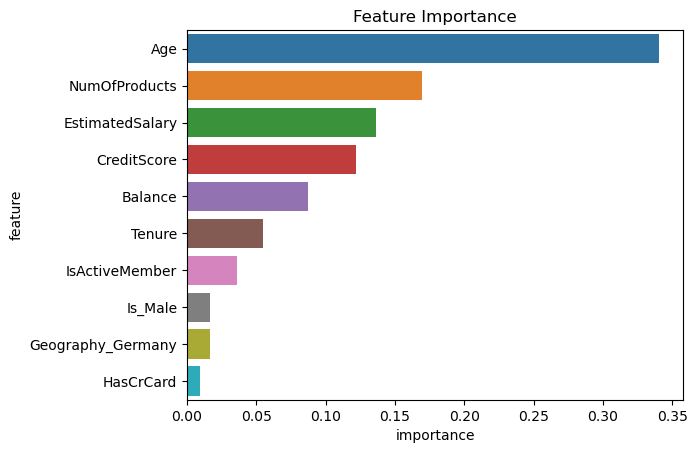

In [13]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [18]:
model = DecisionTreeClassifier(random_state=29, max_depth=2)

In [19]:
%%time
model.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 11.5 ms


DecisionTreeClassifier(max_depth=2, random_state=29)

In [20]:
y_train_probs = model.predict_proba(X_train)[:, 1]
y_val_probs = model.predict_proba(X_val)[:, 1]

Area Under ROC Curve (AUC): 0.8428


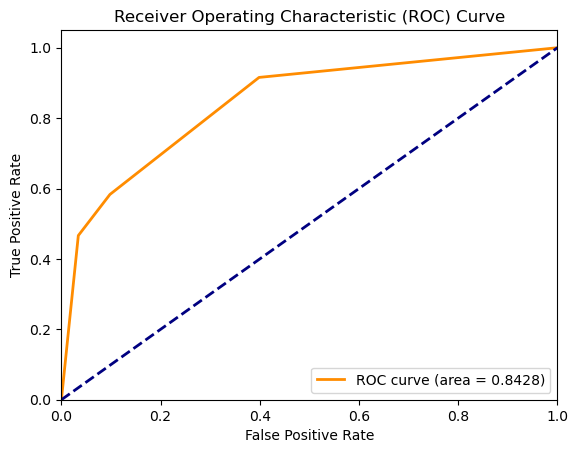

In [21]:
# Обчислення ROC-кривої
fpr, tpr, thresholds = roc_curve(y_train, y_train_probs)

# Обчислення AUC
roc_auc = auc(fpr, tpr)

# Виведення AUC
print(f'Area Under ROC Curve (AUC): {roc_auc:.4f}')

# Побудова графіку ROC-кривої
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Area Under ROC Curve (AUC): 0.8472


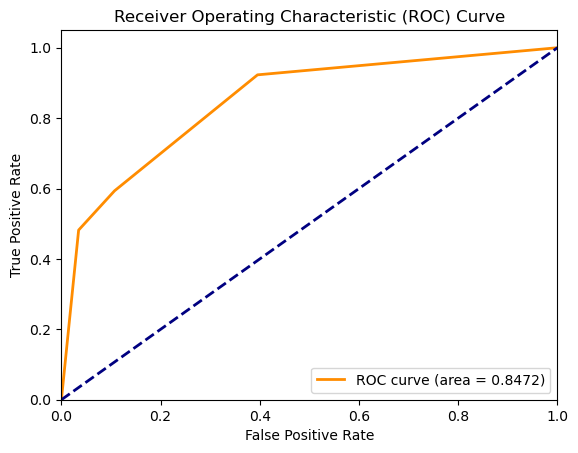

In [22]:
# Обчислення ROC-кривої
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)

# Обчислення AUC
roc_auc = auc(fpr, tpr)

# Виведення AUC
print(f'Area Under ROC Curve (AUC): {roc_auc:.4f}')

# Побудова графіку ROC-кривої
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [23]:
tree_text = export_text(model, max_depth=2, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Age <= 43.50
|   |--- NumOfProducts <= 1.50
|   |   |--- class: 0.0
|   |--- NumOfProducts >  1.50
|   |   |--- class: 0.0
|--- Age >  43.50
|   |--- NumOfProducts <= 1.50
|   |   |--- class: 1.0
|   |--- NumOfProducts >  1.50
|   |   |--- class: 0.0



**Спостереження:** Дерево із глибиною 2 включно показує кращі результати для валідаційних даних. Також видно, що модель добре генералізує, оскільки `ROC Curve` є подібними для обох наборів даних. Для тренувальних `AUC=0.84`, а для валідаційних  `AUC=0.85`. Найвпливовішими ознаками є `Age` та `NumOfProducts`.

In [25]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [26]:
importance_df.head(10)

,feature,importance
1,Age,0.706486
4,NumOfProducts,0.293514
0,CreditScore,0.000000
2,Tenure,0.000000
3,Balance,0.000000
5,HasCrCard,0.000000
6,IsActiveMember,0.000000
7,EstimatedSalary,0.000000
8,Geography_France,0.000000
9,Geography_Germany,0.000000


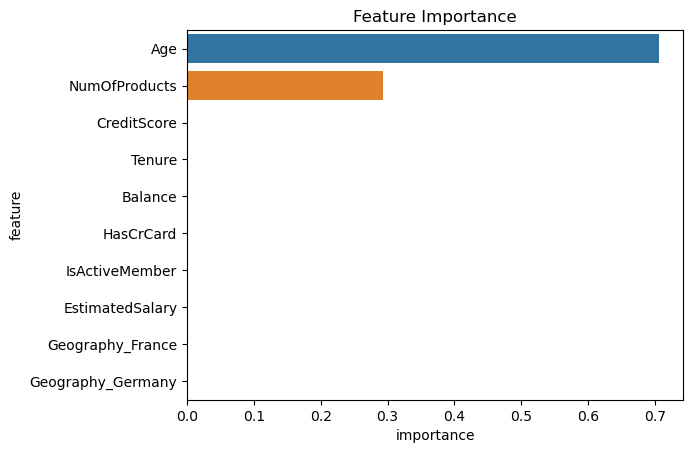

In [27]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [28]:
model = DecisionTreeClassifier(random_state=29, max_depth=3)

In [29]:
%%time
model.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 16 ms


DecisionTreeClassifier(max_depth=3, random_state=29)

In [30]:
y_train_probs = model.predict_proba(X_train)[:, 1]
y_val_probs = model.predict_proba(X_val)[:, 1]

In [31]:
def print_ROC_curve(y, y_probs):
    fpr, tpr, thresholds = roc_curve(y, y_probs)
    roc_auc = auc(fpr, tpr)
    print(f'Area Under ROC Curve (AUC): {roc_auc:.4f}')

In [32]:
def test_depth_and_display_res(X_train, y_train, max_depth=2):
    model = DecisionTreeClassifier(random_state=29, max_depth=max_depth)
    model.fit(X_train, y_train)
    
    y_train_probs = model.predict_proba(X_train)[:, 1]
    y_val_probs = model.predict_proba(X_val)[:, 1]
    
    print_ROC_curve(y_train, y_train_probs)
    print_ROC_curve(y_val, y_val_probs)

In [33]:
test_depth_and_display_res(X_train, y_train, max_depth=2)

Area Under ROC Curve (AUC): 0.8428
Area Under ROC Curve (AUC): 0.8472


In [34]:
test_depth_and_display_res(X_train, y_train, max_depth=3)

Area Under ROC Curve (AUC): 0.8957
Area Under ROC Curve (AUC): 0.8975


In [35]:
test_depth_and_display_res(X_train, y_train, max_depth=4)

Area Under ROC Curve (AUC): 0.9100
Area Under ROC Curve (AUC): 0.9136


In [36]:
test_depth_and_display_res(X_train, y_train, max_depth=5)

Area Under ROC Curve (AUC): 0.9258
Area Under ROC Curve (AUC): 0.9289


In [37]:
test_depth_and_display_res(X_train, y_train, max_depth=6)

Area Under ROC Curve (AUC): 0.9337
Area Under ROC Curve (AUC): 0.9270


In [38]:
test_depth_and_display_res(X_train, y_train, max_depth=7)

Area Under ROC Curve (AUC): 0.9394
Area Under ROC Curve (AUC): 0.9233


In [39]:
test_depth_and_display_res(X_train, y_train, max_depth=8)

Area Under ROC Curve (AUC): 0.9472
Area Under ROC Curve (AUC): 0.9223


In [40]:
test_depth_and_display_res(X_train, y_train, max_depth=9)

Area Under ROC Curve (AUC): 0.9578
Area Under ROC Curve (AUC): 0.8932


**Спостереження:** Найкращі результати показувала модель із параметром `max_depth=5`. Оскільки при `max_depth=9` показник `Area Under ROC Curve (AUC)` почав спадати (що свідчить про перенавчання), зупинюсь у експериментуванні на цьому значенні.  І перейду до тестування параметра `max_leaf_nodes`.

In [41]:
def test_leaf_and_display_res(X_train, y_train, max_leaf_nodes=50):
    model = DecisionTreeClassifier(random_state=29, max_leaf_nodes=max_leaf_nodes)
    model.fit(X_train, y_train)
    
    y_train_probs = model.predict_proba(X_train)[:, 1]
    y_val_probs = model.predict_proba(X_val)[:, 1]
    
    print_ROC_curve(y_train, y_train_probs)
    print_ROC_curve(y_val, y_val_probs)

In [42]:
test_leaf_and_display_res(X_train, y_train, max_leaf_nodes=50)

Area Under ROC Curve (AUC): 0.9293
Area Under ROC Curve (AUC): 0.9262


In [43]:
test_leaf_and_display_res(X_train, y_train, max_leaf_nodes=60)

Area Under ROC Curve (AUC): 0.9310
Area Under ROC Curve (AUC): 0.9259


In [44]:
test_leaf_and_display_res(X_train, y_train, max_leaf_nodes=70)

Area Under ROC Curve (AUC): 0.9322
Area Under ROC Curve (AUC): 0.9262


In [45]:
test_leaf_and_display_res(X_train, y_train, max_leaf_nodes=100)

Area Under ROC Curve (AUC): 0.9365
Area Under ROC Curve (AUC): 0.9176


In [46]:
test_leaf_and_display_res(X_train, y_train, max_leaf_nodes=40)

Area Under ROC Curve (AUC): 0.9281
Area Under ROC Curve (AUC): 0.9276


In [47]:
test_leaf_and_display_res(X_train, y_train, max_leaf_nodes=30)

Area Under ROC Curve (AUC): 0.9218
Area Under ROC Curve (AUC): 0.9226


In [48]:
test_leaf_and_display_res(X_train, y_train, max_leaf_nodes=20)

Area Under ROC Curve (AUC): 0.9179
Area Under ROC Curve (AUC): 0.9210


**Спостереження:** Значення параметра `max_leaf_nodes` близько `40` показує найкращі результати на валідаційних даних.

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [49]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, y_train)
    train_error = 1 - model.score(X_train, y_train)
    val_error = 1 - model.score(X_val, y_val)
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

In [50]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: total: 281 ms
Wall time: 1.07 s


In [51]:
errors_df.style.background_gradient(subset='Validation Error', cmap='Blues_r')

,Max Depth,Training Error,Validation Error
0,1,0.162750,0.168000
1,2,0.135750,0.133000
2,3,0.119833,0.120000
3,4,0.113417,0.118000
4,5,0.103833,0.101000
5,6,0.097167,0.104000
6,7,0.092000,0.105000
7,8,0.084583,0.106667
8,9,0.075833,0.110667
9,10,0.065500,0.115333


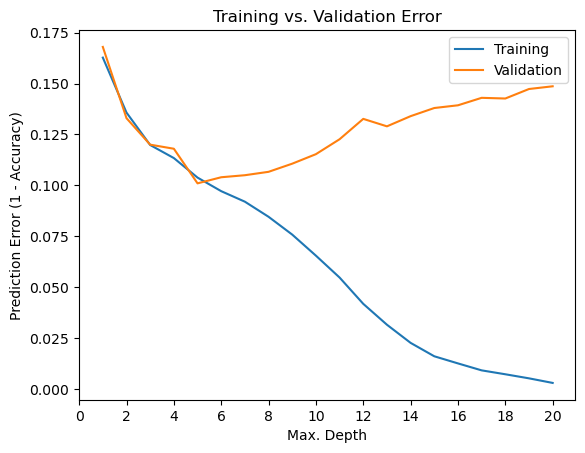

In [52]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation']);

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [53]:
model = DecisionTreeClassifier(random_state=29, max_depth=5)
model.fit(X_train, y_train)
    
y_train_probs = model.predict_proba(X_train)[:, 1]
y_val_probs = model.predict_proba(X_val)[:, 1]
    
print_ROC_curve(y_train, y_train_probs)
print_ROC_curve(y_val, y_val_probs)

Area Under ROC Curve (AUC): 0.9258
Area Under ROC Curve (AUC): 0.9289


In [54]:
raw_test_data = pd.read_csv('bank-customer-churn-prediction-dlu/test.csv')

In [55]:
test_data = preprocess_new_data(raw_test_data, scaler=scaler, encoder=encoder, input_cols=input_cols)

In [58]:
y_test_probs = model.predict_proba(test_data['X_test'])[:, 1]

In [62]:
test_data['Exited'] = y_test_probs

In [63]:
sample_submission = pd.read_csv('bank-customer-churn-prediction-dlu/sample_submission.csv')

In [64]:
sample_submission['Exited'] = test_data['Exited']

In [66]:
sample_submission.to_csv('bank-customer-churn-prediction-dlu/submission_tree_1.csv', index=False)

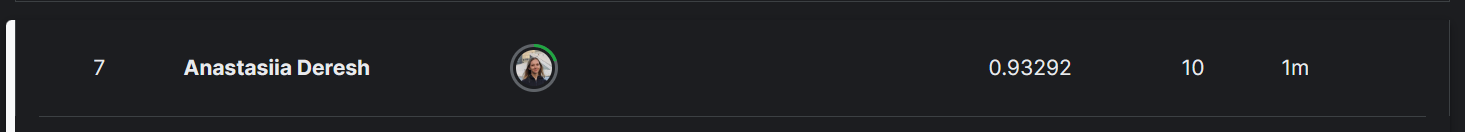